In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("CouponAcceptance.csv")

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [6]:
df.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [8]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [7]:
for i in df.select_dtypes("O"):
    print("#########################")
    print(df[i].value_counts())
    print("*************************")

#########################
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
*************************
#########################
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
*************************
#########################
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
*************************
#########################
coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64
*************************
#########################
expiration
1d    7091
2h    5593
Name: count, dtype: int64
*************************
#########################
gender
Female    6511
Male      6173
Name: count, dtype: int64
*************************
#########################
age
21         2653
26         2559
31         2039
50plus  

In [8]:
df["Restaurant20To50"].replace({"less1":"0",
                  "never":"0",
                  "gt8":"greater than 8",
                  "1~3":"1 to 3",
                  "4~8":"4 to 8",},inplace=True)

In [9]:
df["RestaurantLessThan20"].replace({"less1":"0",
                  "never":"0",
                  "gt8":"greater than 8",
                  "1~3":"1 to 3",
                  "4~8":"4 to 8",},inplace=True)

In [10]:
df["CarryAway"].replace({"less1":"0",
                  "never":"0",
                  "gt8":"greater than 8",
                  "1~3":"1 to 3",
                  "4~8":"4 to 8",},inplace=True)

In [11]:
df["CoffeeHouse"].replace({"less1":"0",
                  "never":"0",
                  "gt8":"greater than 8",
                  "1~3":"1 to 3",
                  "4~8":"4 to 8",},inplace=True)

In [12]:
df["Bar"].replace({"less1":"0",
                  "never":"0",
                  "gt8":"greater than 8",
                  "1~3":"1 to 3",
                  "4~8":"4 to 8",},inplace=True)

In [13]:
df["passanger"].replace({"Friend(s)":"Friend",
                        "Kid(s)":"Kid"},inplace=True
                       )

In [14]:
df["coupon"].replace({"Restaurant(<20)":"Restaurant less than 20",
                     "Restaurant(20-50)":"Restaurant 20 to 50",
                     "Carry out & Take away":"Carry out and Take away"},inplace=True)

In [15]:
df["expiration"].replace({"1d":"24h"},inplace=True)

In [16]:
df["age"].replace({"50plus":"50",
                  "below21":"21"},inplace=True)

In [17]:
df["maritalStatus"].replace({"Unmarried partner" : "unmarried",
                             "Divorced"  :"unmarried" ,
                             "Single":"unmarried",
                             "Widowed":"unmarried"},inplace=True)

In [18]:
df.rename(columns={"Accept(Y/N?)":"Accept"},inplace=True)

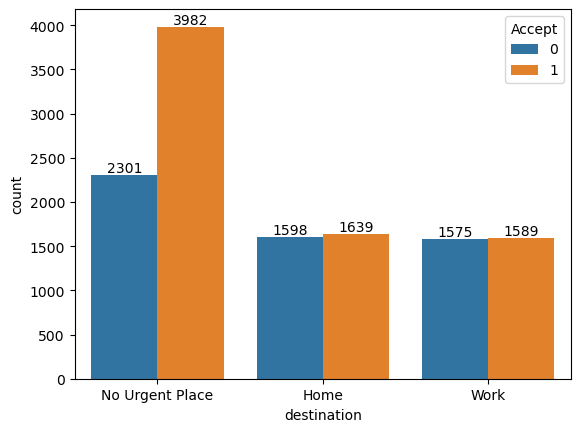

In [19]:
ax=sns.countplot(x=df["destination"],hue = df["Accept"])
for container in ax.containers:
    ax.bar_label(container)

In [20]:
df.rename(columns={"RestaurantLessThan20":"Restaurant<20"},inplace=True)

In [21]:
df.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,Restaurant<20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept
0,No Urgent Place,Alone,Sunny,55,Restaurant less than 20,24h,Female,21,unmarried,1,...,0,NaN,4 to 8,1 to 3,1,0,0,0,1,1
1,No Urgent Place,Friend,Sunny,80,Coffee House,2h,Female,21,unmarried,1,...,0,NaN,4 to 8,1 to 3,1,0,0,0,1,0


In [22]:
def draw_countplot(col):
    ax=sns.countplot(x=col,hue=df["Accept"],data = df)
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

In [23]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'Restaurant<20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

In [24]:
#for i in df.select_dtypes("O"):
#   draw_countplot(i)

In [25]:
def univariate_analysis(col):
    df_EDA=pd.DataFrame(sorted(list(df[col].unique())),columns=[col])
    df_EDA["Total Records"]=list(df.groupby(col).Accept.count())
    df_EDA["Accept"]=list(df[df.Accept==1].groupby(col).Accept.count())
    df_EDA["Reject"]=list(df[df.Accept==0].groupby(col).Accept.count())
    df_EDA["% of Accept"]=df_EDA["Accept"]/df_EDA["Total Records"]*100
    df_EDA["% of Reject"]=df_EDA["Reject"]/df_EDA["Total Records"]*100
    return df_EDA

In [26]:
univariate_analysis("destination")

,destination,Total Records,Accept,Reject,% of Accept,% of Reject
0,Home,3237,1639,1598,50.633302,49.366698
1,No Urgent Place,6283,3982,2301,63.377367,36.622633
2,Work,3164,1589,1575,50.221239,49.778761


In [27]:
univariate_analysis("age")

,age,Total Records,Accept,Reject,% of Accept,% of Reject
0,21,3200,1934,1266,60.437500,39.562500
1,26,2559,1525,1034,59.593591,40.406409
2,31,2039,1114,925,54.634625,45.365375
3,36,1319,706,613,53.525398,46.474602
4,41,1093,626,467,57.273559,42.726441
5,46,686,395,291,57.580175,42.419825
6,50,1788,910,878,50.894855,49.105145


In [28]:
univariate_analysis("gender")

,gender,Total Records,Accept,Reject,% of Accept,% of Reject
0,Female,6511,3563,2948,54.722777,45.277223
1,Male,6173,3647,2526,59.079864,40.920136


In [29]:
univariate_analysis("occupation")

,occupation,Total Records,Accept,Reject,% of Accept,% of Reject
0,Architecture & Engineering,175,111,64,63.428571,36.571429
1,Arts Design Entertainment Sports & Media,629,326,303,51.828299,48.171701
2,Building & Grounds Cleaning & Maintenance,44,26,18,59.090909,40.909091
3,Business & Financial,544,310,234,56.985294,43.014706
4,Community & Social Services,241,118,123,48.962656,51.037344
5,Computer & Mathematical,1408,798,610,56.676136,43.323864
6,Construction & Extraction,154,106,48,68.831169,31.168831
7,Education&Training&Library,943,494,449,52.386002,47.613998
8,Farming Fishing & Forestry,43,23,20,53.488372,46.511628
9,Food Preparation & Serving Related,298,174,124,58.389262,41.610738


In [30]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'Restaurant<20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept'],
      dtype='object')

In [31]:
univariate_analysis("temperature")

,temperature,Total Records,Accept,Reject,% of Accept,% of Reject
0,30,2316,1230,1086,53.108808,46.891192
1,55,3840,2061,1779,53.671875,46.328125
2,80,6528,3919,2609,60.033701,39.966299


In [32]:
univariate_analysis("weather")

,weather,Total Records,Accept,Reject,% of Accept,% of Reject
0,Rainy,1210,560,650,46.280992,53.719008
1,Snowy,1405,661,744,47.046263,52.953737
2,Sunny,10069,5989,4080,59.479591,40.520409


In [33]:
univariate_analysis("income")

,income,Total Records,Accept,Reject,% of Accept,% of Reject
0,$100000 or More,1736,1004,732,57.834101,42.165899
1,$12500 - $24999,1831,1052,779,57.454943,42.545057
2,$25000 - $37499,2013,1194,819,59.314456,40.685544
3,$37500 - $49999,1805,1018,787,56.398892,43.601108
4,$50000 - $62499,1659,988,671,59.553948,40.446052
5,$62500 - $74999,846,446,400,52.718676,47.281324
6,$75000 - $87499,857,414,443,48.308051,51.691949
7,$87500 - $99999,895,476,419,53.184358,46.815642
8,Less than $12500,1042,618,424,59.309021,40.690979


In [34]:
univariate_analysis("maritalStatus")

,maritalStatus,Total Records,Accept,Reject,% of Accept,% of Reject
0,Married partner,5100,2769,2331,54.294118,45.705882
1,unmarried,7584,4441,3143,58.557489,41.442511


In [35]:
df.to_csv("CoupanAcceptance.csv", index=False)